In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
works = pd.read_csv('../data/works.csv')
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN
...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+...,NaN


In [3]:
tags = pd.read_csv('../data/tags.csv')
tags

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


In [4]:
def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")

In [5]:
def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [6]:
tags['name'] = tags['name'].astype('string')

In [7]:
th_tag = tags.loc[tags['name'].str.contains(str('Hobbit'))].sort_values(by='cached_count', ascending=False)['id'].values[0]

In [8]:
works['tags'] = works['tags'].astype('string')

In [9]:
mv_works = works.loc[works['tags'].str.contains(str(th_tag))]
mv_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
1312,2021-02-26,en,False,True,5677.0,721553+2403411+1691134+1011803+989133+859731+8...,NaN
2089,2021-02-26,en,False,True,3462.0,12+114961+541478+8201560+54883689+275124+82139...,NaN
2306,2021-02-26,en,False,True,788.0,11+541478+873394+114961+8105140+2918819+731952...,NaN
2872,2021-02-26,en,False,False,2666.0,12+541478+13597+16533+409544+409545+685019+589...,NaN
3401,2021-02-26,en,False,True,1402.0,11+721553+2282739+1691134+1011803+418427+54894...,NaN
...,...,...,...,...,...,...,...
7006537,2012-01-16,en,False,True,856.0,9+21+14+114961+133297+114941+16533+99983+40953...,NaN
7006547,2012-01-16,en,False,True,4331.0,13+23+14+114961+133297+409520+99983+16533+5514...,NaN
7086162,2011-07-05,en,False,True,439.0,10+21+16+1138+13597+62+2096+6042249+541478,NaN
7103718,2011-05-11,en,False,True,604.0,10+21+16+15918+246127+114961+541478+230931+938461,NaN


In [10]:
mv_date_counts = mv_works['creation date'].value_counts().to_frame().sort_values(by='creation date').reset_index()

In [14]:
mv_date_counts['year'] = mv_date_counts['creation date'].str[:4]

In [24]:
mv_date_counts['month'] = mv_date_counts['creation date'].str[5:7]

In [25]:
mv_date_counts

,creation date,count,year,month
0,2010-10-23,1,2010,10
1,2011-05-11,1,2011,05
2,2011-07-05,1,2011,07
3,2012-01-16,3,2012,01
4,2012-05-03,1,2012,05
...,...,...,...,...
2976,2021-02-22,6,2021,02
2977,2021-02-23,11,2021,02
2978,2021-02-24,8,2021,02
2979,2021-02-25,4,2021,02


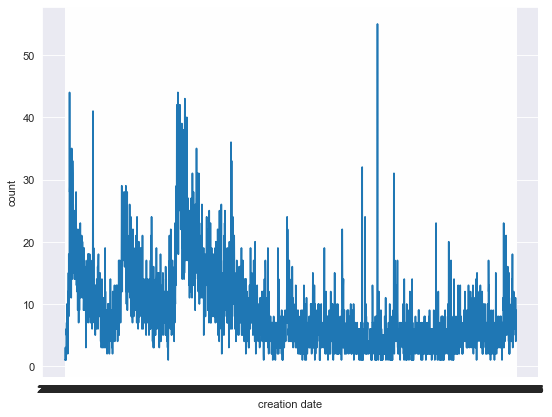

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=mv_date_counts, x=mv_date_counts['creation date'], y=mv_date_counts['count'])
plt.show()

In [41]:
mv_sums = mv_date_counts.groupby(['year'])['count'].sum().to_frame().reset_index()

In [44]:
mv_sums_m = mv_date_counts.groupby(['year', 'month'])['count'].sum().to_frame().reset_index()

In [51]:
mv_date_counts['sm_date'] = mv_date_counts['creation date'].str[0:7]
mv_date_counts

,creation date,count,year,month,sm_date
0,2010-10-23,1,2010,10,2010-10
1,2011-05-11,1,2011,05,2011-05
2,2011-07-05,1,2011,07,2011-07
3,2012-01-16,3,2012,01,2012-01
4,2012-05-03,1,2012,05,2012-05
...,...,...,...,...,...
2976,2021-02-22,6,2021,02,2021-02
2977,2021-02-23,11,2021,02,2021-02
2978,2021-02-24,8,2021,02,2021-02
2979,2021-02-25,4,2021,02,2021-02


In [53]:
mv_sm_date_counts = mv_date_counts.groupby('sm_date')['count'].sum().to_frame().reset_index()

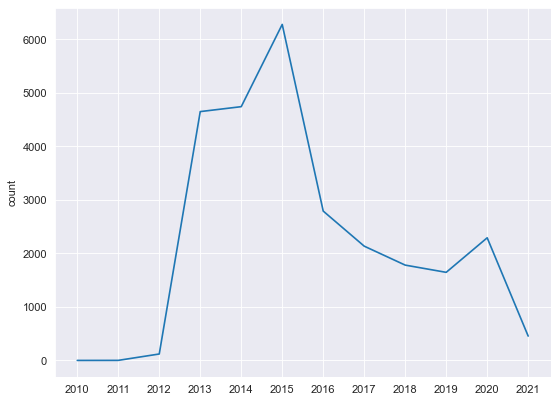

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=mv_sums, x=mv_sums['year'].unique(), y=mv_sums['count'])
plt.show()

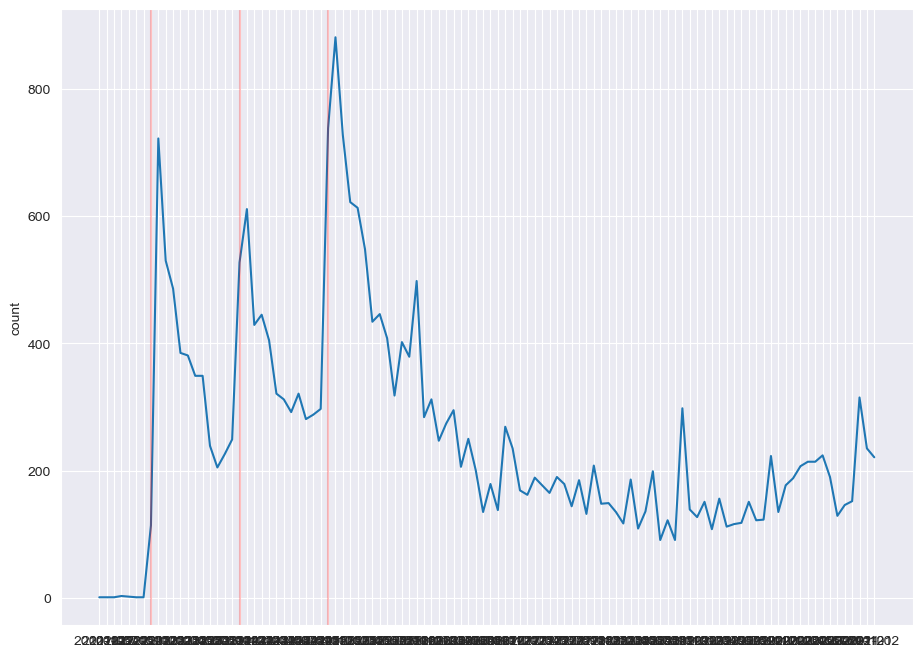

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=mv_sm_date_counts, x=mv_sm_date_counts['sm_date'].unique(), y=mv_sm_date_counts['count'])
plt.axvline(x='2012-12', color='red', alpha=0.25) 
plt.axvline(x='2013-12', color='red', alpha=0.25)
plt.axvline(x='2014-12', color='red', alpha=0.25)
plt.show()

In [58]:
works['year'] = works['creation date'].str[:4]
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN,2021
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN,2021
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN,2021
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN,2021
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN,2021
...,...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN,2008
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN,2008
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN,2008
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+...,NaN,2008


<Axes: xlabel='year', ylabel='Count'>

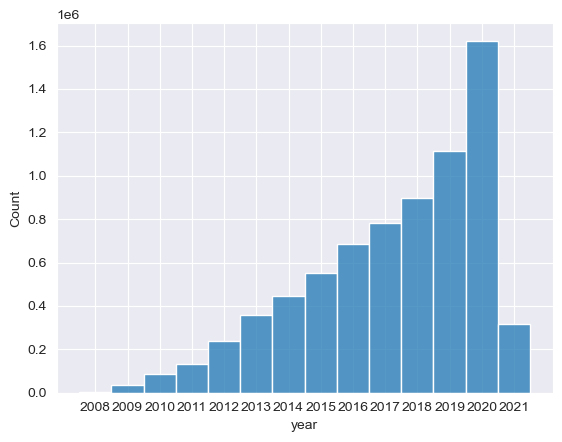

In [61]:
plot_works = works.sort_values(by='year')
sns.histplot(data=plot_works, x=plot_works['year'])